In [1]:
import xarray as xr
import cdsapi
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
if os.path.isfile("era5_sst.nc"):
    pass
else:
    c = cdsapi.Client()
    c.retrieve(
        'reanalysis-era5-single-levels',
        {
            'product_type': 'reanalysis',
            'format': 'netcdf',
            'variable': 'sea_surface_temperature',
            'year': '2023',
            'month': '10',
            'day': '16',
            'time': '03:00',
            'area': [-9, 111, -45, 160],
        },
        'era5_sst.nc')

In [3]:
era5_sst = xr.open_dataset("era5_sst.nc")
ramssa_sst = xr.open_dataset("https://thredds.aodn.org.au/thredds/dodsC/IMOS/SRS/SST/ghrsst/L4/RAMSSA/2023/20231016120000-ABOM-L4_GHRSST-SSTfnd-RAMSSA_09km-AUS-v02.0-fv01.0.nc?time[0:1:0],lat[300:1:540],lon[960:1:1320],analysed_sst[0:1:0][300:1:540][960:1:1320]")

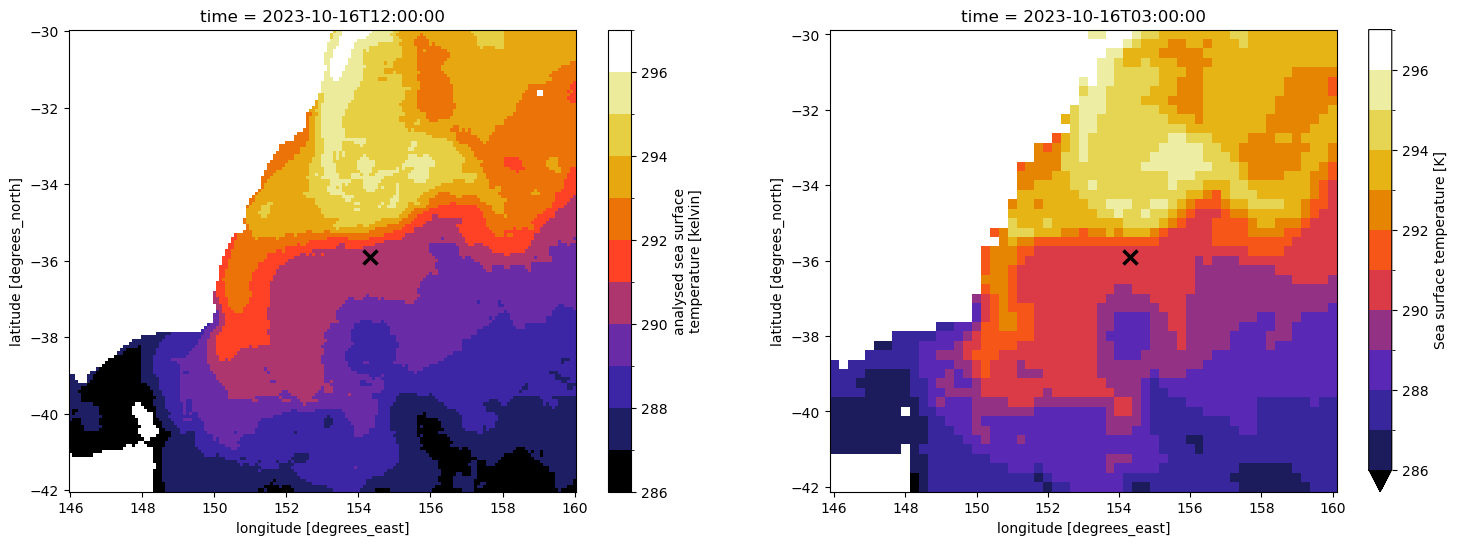

In [17]:
plt.figure(figsize=[18,6])
plt.subplot(1,2,1)
ramssa_sst.isel(time=0).analysed_sst.sel(lat=slice(-42,-30),lon=slice(146,160)).plot(cmap=plt.get_cmap("CMRmap"),levels=np.linspace(286,297,12))
plt.plot(154.3239,-35.9070,marker="x",ms=10,mew=2.5,color="k")
plt.subplot(1,2,2)
era5_sst.isel(time=0).sst.sel(latitude=slice(-30,-42),longitude=slice(146,160)).plot(cmap=plt.get_cmap("CMRmap"),levels=np.linspace(286,297,12))
plt.plot(154.3239,-35.9070,marker="x",ms=10,mew=2.5,color="k")

In [5]:
base = "https://thredds.aodn.org.au/thredds/dodsC/IMOS/SRS/SST/ghrsst/L4/RAMSSA/%4d/%4d10%02d120000-ABOM-L4_GHRSST-SSTfnd-RAMSSA_09km-AUS-v02.0-fv01.0.nc?time[0:1:0],lat[300:1:540],lon[960:1:1320],analysed_sst[0:1:0][300:1:540][960:1:1320]"
url_list = []
for d in range(2006,2023):
    for dd in range(11,22):
        url_list.append(base % (d,d,dd))
ramssa_climo = xr.open_mfdataset(url_list)

In [9]:
ramssa_climo_mean = ramssa_climo.analysed_sst.mean("time").persist()

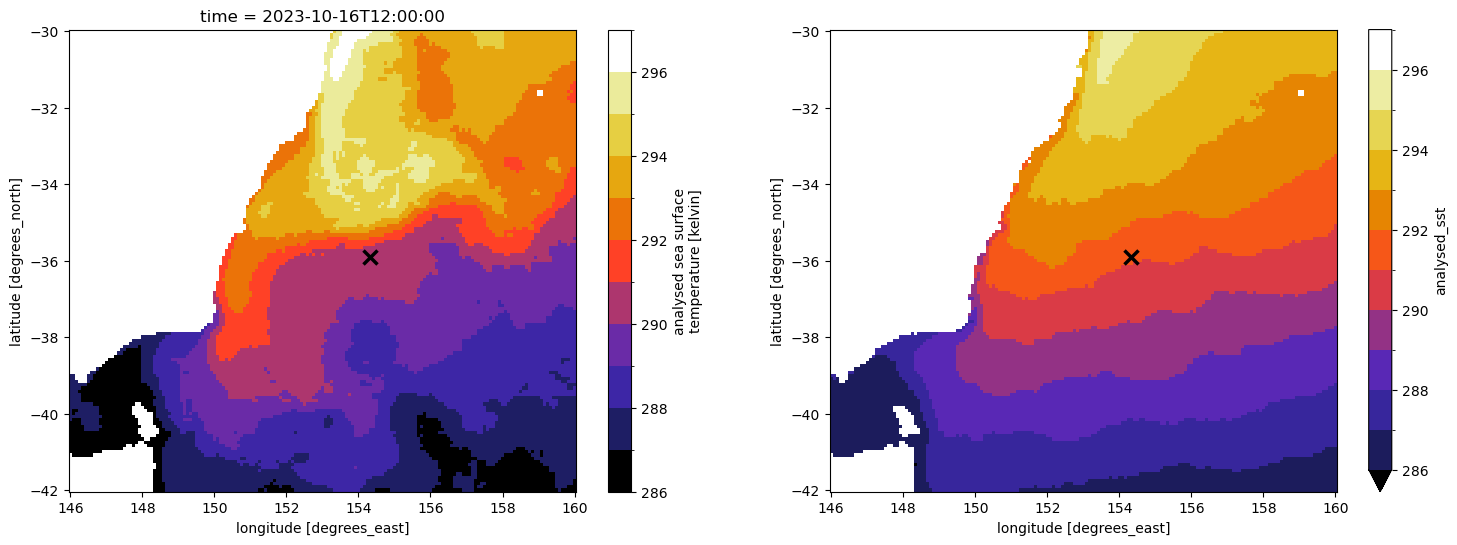

In [18]:
plt.figure(figsize=[18,6])
plt.subplot(1,2,1)
ramssa_sst.isel(time=0).analysed_sst.sel(lat=slice(-42,-30),lon=slice(146,160)).plot(cmap=plt.get_cmap("CMRmap"),levels=np.linspace(286,297,12))
plt.plot(154.3239,-35.9070,marker="x",ms=10,mew=2.5,color="k")
plt.subplot(1,2,2)
ramssa_climo_mean.sel(lat=slice(-42,-30),lon=slice(146,160)).plot(cmap=plt.get_cmap("CMRmap"),levels=np.linspace(286,297,12))
plt.plot(154.3239,-35.9070,marker="x",ms=10,mew=2.5,color="k")

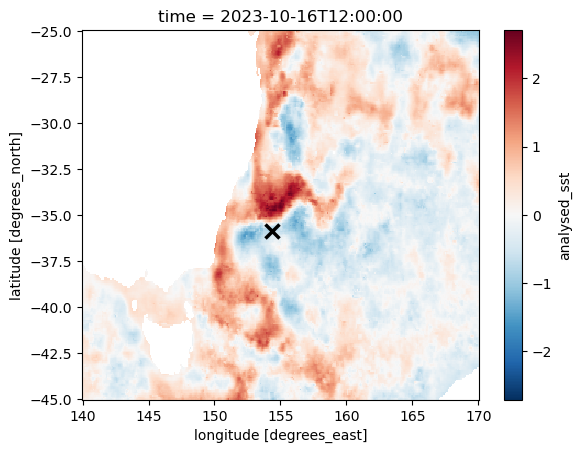

In [19]:
(ramssa_sst.isel(time=0).analysed_sst - ramssa_climo_mean).plot()
plt.plot(154.3239,-35.9070,marker="x",ms=10,mew=2.5,color="k")

Text(0.5, 1.0, 'RAMSSA - ERA5')

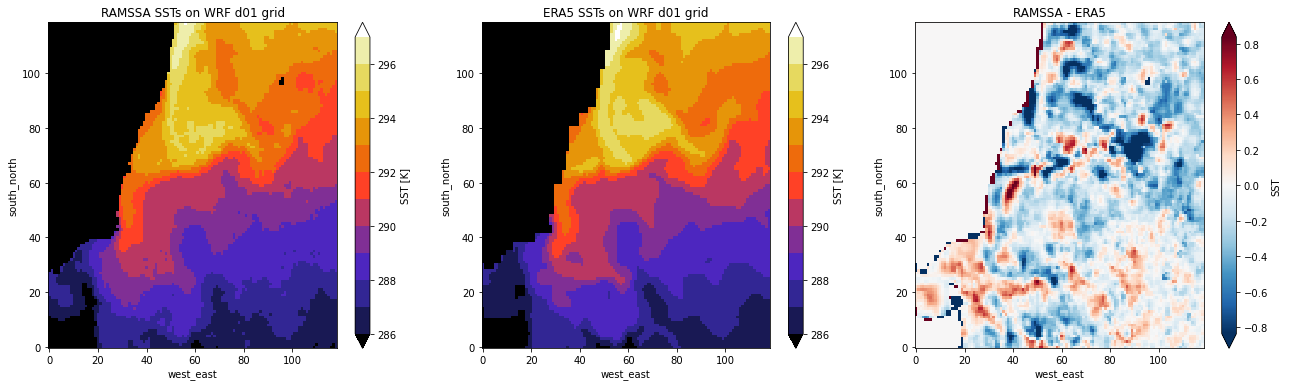

In [26]:
#On gadi
plt.figure(figsize=[22,6])
plt.subplot(1,3,1)
f1 = xr.open_dataset("/g/data/eg3/ab4502/WRF/WPS/met_em.d01.2023-10-15_03:00:00.nc")
f1["SST"].plot(cmap=plt.get_cmap("CMRmap"),levels=np.linspace(286,297,12))
plt.title("RAMSSA SSTs on WRF d01 grid")

plt.subplot(1,3,2)
f2 = xr.open_dataset("/g/data/w40/ab4502/WRF_simulations/tasman_d04_20231015_20231016/wrfout_d01_2023-10-15_03:00:00")
f2["SST"].plot(cmap=plt.get_cmap("CMRmap"),levels=np.linspace(286,297,12))
plt.title("ERA5 SSTs on WRF d01 grid")

plt.subplot(1,3,3)
(f1["SST"] - f2["SST"]).plot(robust="True")
plt.title("RAMSSA - ERA5")
